<a href="https://colab.research.google.com/github/Rajan-20/Weather-Report-and-Visualization/blob/main/weather_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the neccessary libraries
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#visualizing the maximum and minimum temperature in a day
def max_min_temp(time_list,min_temp,max_temp):
  sns.set_style("dark")
  plt.bar(time_list,min_temp,color='g',alpha=0.7)
  plt.bar(time_list,max_temp,color='r',alpha=0.7,bottom=min_temp)
  plt.legend(['min_temp','max_temp'])
  plt.title("Maximum and Minimum temperature in day")
  plt.xlabel("Time Period (YYYY-MM-DD HH:MM:SS)")
  plt.ylabel("Temperature (°C)")
  plt.tick_params(axis='x',labelsize=15,rotation=90)
  plt.figure(figsize = (15, 12));


In [3]:
#visualizing the average temperature in a day
def avg_temp(time_list,temper):
  sns.set_style("darkgrid")
  plt.plot(time_list,temper,color='r',marker='1')
  plt.tick_params(axis='x',labelsize=15,rotation=90)
  plt.tight_layout()
  plt.title("Average temperature in day")
  plt.xlabel("Time Period (YYYY-MM-DD HH:MM:SS)")
  plt.ylabel("Temperature in celsius")
  plt.figure(figsize = (8,4))

In [4]:
#visualizing the humidity in a day for the location
def hum(humidity,time_list):
  sns.barplot(x=humidity,y=time_list)
  plt.title("Humidity level in a day")
  plt.xlabel("Humidity in %")
  plt.ylabel("Time Period (YYYY-MM-DD HH:MM:SS)")

In [5]:
##visualizing the rain volume, 3 hours once in a day
def volume_rain(time_list,rain_vol):
  plt.bar(time_list,rain_vol,color='skyblue')
  plt.tick_params(axis='x',labelsize=15,rotation=90)
  plt.tight_layout()
  plt.title("Rain volume in day")
  plt.xlabel("Time Period (YYYY-MM-DD HH:MM:SS)")
  plt.ylabel("Volume(mm)")
  plt.figure(figsize = (12,7))

In [6]:
def visual(city_name_geo_loc):
    response = requests.get("https://api.openweathermap.org/data/2.5/forecast?q={}&appid=7c837d940fddd7f243ac065cba81dc18".format(city_name_geo_loc))
    dicte = response.json()

    def temp_change(kelvin):
        return format(kelvin - 273.15,".2f")

    max_temp = []
    min_temp = []
    humidity = []
    wind_speed =[]
    temper = []
    rain_vol =[]
    pressure = []
    time_list = []

    for i in range(0,len(dicte['list'])):

      if datetime.now().strftime("%Y-%m-%d") in dicte['list'][i]['dt_txt']:
        time_list.append(dicte['list'][i]['dt_txt'])
        for j in dicte['list'][i]['main'].keys():    
          if j == 'temp_max':
              max_temp.append(float(temp_change(dicte['list'][i]['main']['temp_max'])))
          elif j == 'temp_min':
              min_temp.append(float(temp_change(dicte['list'][i]['main']['temp_min'])))
          elif j == 'temp':
              temper.append(float(temp_change(dicte['list'][i]['main']['temp'])))
          elif j == 'pressure':
              pressure.append(float(dicte['list'][i]['main']['pressure']))
          elif j == 'humidity':
              humidity.append(float(dicte['list'][i]['main']['humidity']))
        for k in dicte['list'][i]['wind'].keys():     
            if k == 'speed':
                wind_speed.append(float(dicte['list'][i]['wind']['speed']))
        try:
            for l in dicte['list'][i]['rain'].keys():
                if l == '3h':
                    rain_vol.append(float(dicte['list'][i]['rain']['3h']))
        except:
            rain_vol.append(0)
  
    volume_rain(time_list,rain_vol)
    max_min_temp(time_list,min_temp,min_temp)
    avg_temp(time_list,temper)
    hum(humidity,time_list)


In [7]:
#Return the current weather based on the given location
def location(cityName):
    response = requests.get("https://api.openweathermap.org/data/2.5/weather?q={}&appid=7c837d940fddd7f243ac065cba81dc18".format(cityName))
    response1 = response.json()
    print("Co-ordinates:",end='\n\t')
    print("long:",response1['coord']['lon'],end=',')
    print("lat:",response1['coord']['lat'])
    print("Description :",response1['weather'][0]['main'])
    kelvin = response1['main']['temp']
    celsius = kelvin-273.15
    print("Temperature :{}°C".format(format(celsius,".2f")))
    humidity = response1['main']['humidity']
    print("Humidity :{}%".format(humidity))
    print("Wind speed :",response1['wind']['speed'],"km/h")
    visual(cityName)

In [8]:
#Return the current weather based on the geo coordinates
def geo_coordinates(lat,lon):
    response = requests.get("https://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&appid=7c837d940fddd7f243ac065cba81dc18".format(lat,lon))
    response1 = response.json()
    city_name_coord = response1['name']
    print("City Name :",response1['name'])
    print("Description :", response1['weather'][0]['main'])
    kelvin = response1['main']['temp']
    celsius = kelvin - 273.15
    print("Temperature :{}°C".format(format(celsius, ".2f")))
    humidity = response1['main']['humidity']
    print("Humidity :{}%".format(humidity))
    print("Wind speed :", response1['wind']['speed'], "km/h")
    visual(city_name_coord)

Please, choose your gateway
1.Getting the weather based on Geo co-ordinates
2.Getting the weather based on City Name
2
---------------------------------------output--------------------------------------
Enter the city name: Tirunelveli
Co-ordinates:
	long: 77.7,lat: 8.7333
Description : Clouds
Temperature :26.95°C
Humidity :81%
Wind speed : 2 km/h


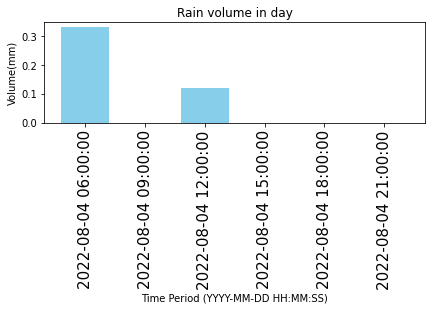

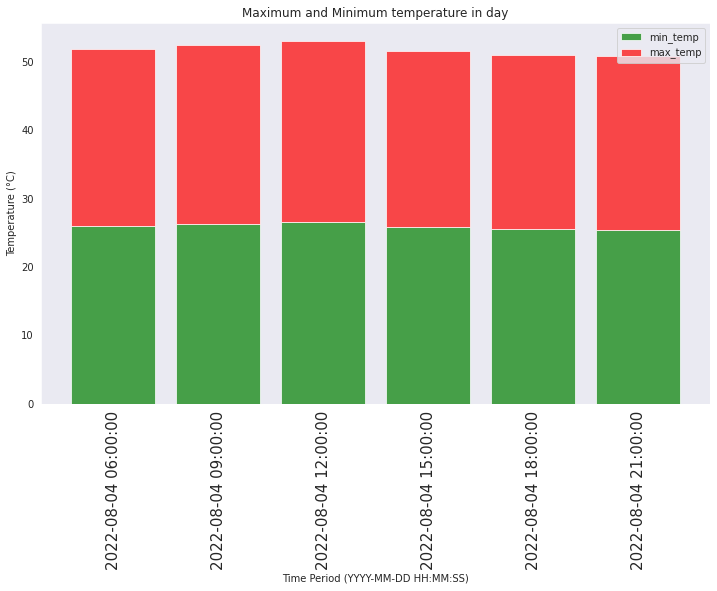

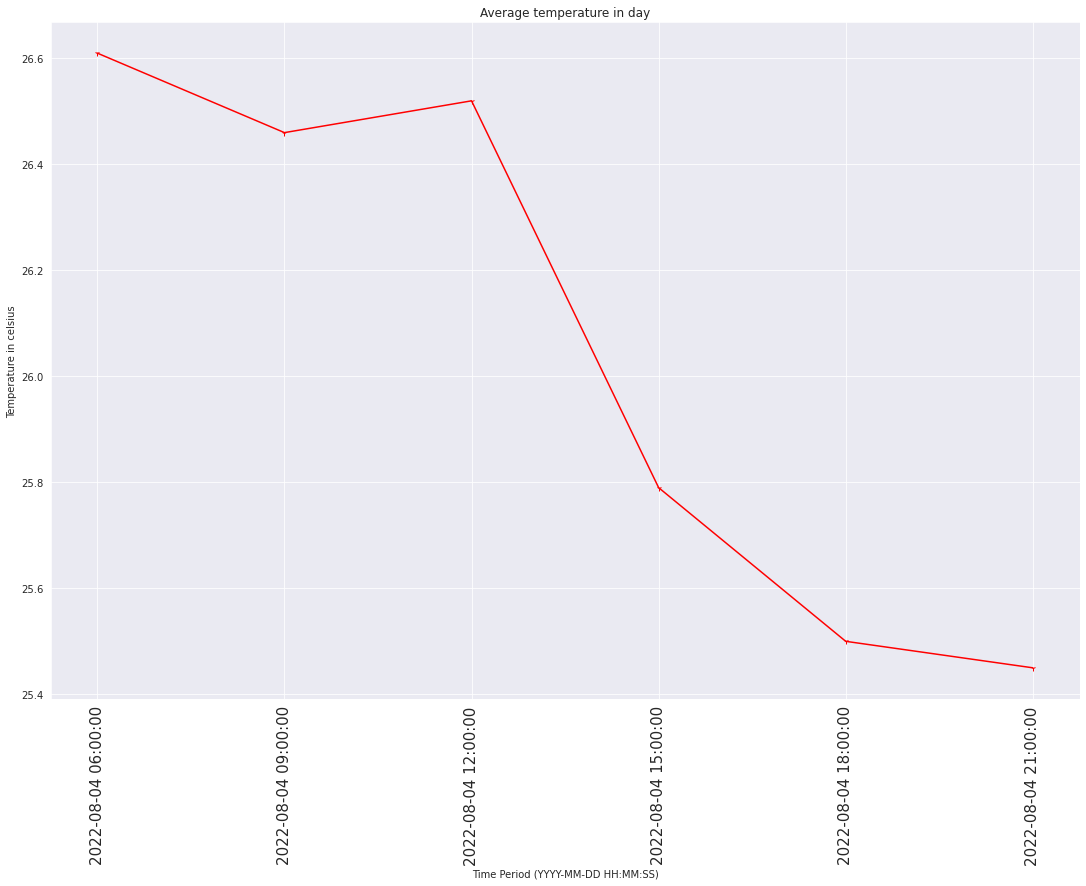

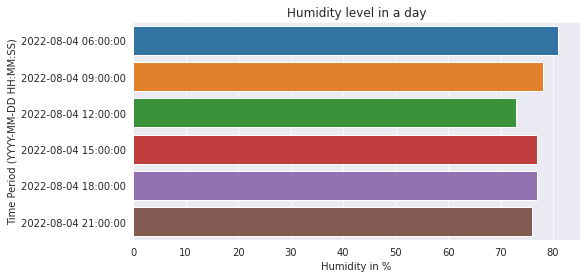

In [9]:
#Select the given option for getting the current weather and forecast visualization
print("Please, choose your gateway")
print("1.Getting the weather based on Geo co-ordinates")
print("2.Getting the weather based on City Name")
option = int(input())
print("---------------------------------------output--------------------------------------")
if option == 1:
    latitude = float(input("Enter the latitude: "))
    longitude = float(input("Enter the longitude: "))
    geo_coordinates(latitude,longitude)
elif option == 2:
    city_name = input("Enter the city name: ")
    location(city_name)
else:
    print("Please choose the correct option")